In [1]:

import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
who_df = pd.read_csv('who_life_exp.csv')
who_df.head()

,country,country_code,region,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,...,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni,une_poverty,une_edu_spend,une_literacy,une_school
0,Angola,AGO,Africa,2000,47.33730,14.73400,383.5583,0.137985,0.025695,1.47439,...,1.90860,16395.473,122.2,46.522,1.0,2530.0,32.3,2.60753,NaN,NaN
1,Angola,AGO,Africa,2001,48.19789,14.95963,372.3876,0.133675,0.024500,1.94025,...,4.48352,16945.753,118.9,47.059,1.1,2630.0,NaN,NaN,67.40542,NaN
2,Angola,AGO,Africa,2002,49.42569,15.20010,354.5147,0.128320,0.023260,2.07512,...,3.32946,17519.417,115.1,47.702,1.2,3180.0,NaN,NaN,NaN,NaN
3,Angola,AGO,Africa,2003,50.50266,15.39144,343.2169,0.122040,0.021925,2.20275,...,3.54797,18121.479,110.8,48.440,1.3,3260.0,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,2004,51.52863,15.56860,333.8711,0.115700,0.020545,2.41274,...,3.96720,18758.145,106.2,49.263,1.3,3560.0,NaN,NaN,NaN,NaN


### Data Cleanup {-}
Remove missing data or impute values based on means

In [3]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          3111 non-null   object 
 1   country_code     3111 non-null   object 
 2   region           3111 non-null   object 
 3   year             3111 non-null   int64  
 4   life_expect      3111 non-null   float64
 5   life_exp60       3111 non-null   float64
 6   adult_mortality  3111 non-null   float64
 7   infant_mort      3111 non-null   float64
 8   age1-4mort       3111 non-null   float64
 9   alcohol          3061 non-null   float64
 10  bmi              3077 non-null   float64
 11  age5-19thinness  3077 non-null   float64
 12  age5-19obesity   3077 non-null   float64
 13  hepatitis        2542 non-null   float64
 14  measles          3092 non-null   float64
 15  polio            3092 non-null   float64
 16  diphtheria       3092 non-null   float64
 17  basic_water   

In [4]:
# Drop the columns that have too many null values to imput
who_df.drop(['hepatitis', 'doctors', 'hospitals', 'une_poverty', 'une_literacy', 'une_school', 'une_edu_spend'], axis=1, inplace=True)

## rename gghe-d since that's a problem later
who_df.rename(columns={'gghe-d': 'health_expenditure', 'age5-19obesity': 'youth_obesity'}, inplace=True)

### Correlation {-}
Look at the correlation between continuous variables

In [5]:
continuous_df = who_df.drop(['region', 'country', 'country_code'], axis=1)
continuous_df.corr()

,year,life_expect,life_exp60,adult_mortality,infant_mort,age1-4mort,alcohol,bmi,age5-19thinness,youth_obesity,...,diphtheria,basic_water,gni_capita,health_expenditure,che_gdp,une_pop,une_infant,une_life,une_hiv,une_gni
year,1.000000,0.190961,0.192872,-0.170946,-0.195293,-0.191723,0.006428,0.170244,-0.081810,0.278359,...,0.141351,0.109352,0.118967,0.081852,0.112887,0.016757,-0.187952,0.185664,-0.018294,0.147887
life_expect,0.190961,1.000000,0.886159,-0.946419,-0.930113,-0.864414,0.399797,0.597996,-0.565396,0.621000,...,0.640473,0.831099,0.585603,0.609787,0.284920,0.032126,-0.931899,0.991448,-0.511821,0.603019
life_exp60,0.192872,0.886159,1.000000,-0.775321,-0.769839,-0.661082,0.465785,0.458839,-0.556536,0.547764,...,0.503303,0.680990,0.582539,0.670995,0.388805,0.004131,-0.776510,0.869439,-0.343894,0.602258
adult_mortality,-0.170946,-0.946419,-0.775321,1.000000,0.813210,0.756230,-0.246530,-0.517095,0.455205,-0.571792,...,-0.529967,-0.732704,-0.527650,-0.485836,-0.198618,-0.061503,0.814884,-0.943640,0.680558,-0.544664
infant_mort,-0.195293,-0.930113,-0.769839,0.813210,1.000000,0.909032,-0.444580,-0.641874,0.578230,-0.602402,...,-0.720741,-0.851514,-0.539514,-0.576804,-0.238393,-0.003967,0.996975,-0.926927,0.341615,-0.549928
age1-4mort,-0.191723,-0.864414,-0.661082,0.756230,0.909032,1.000000,-0.305744,-0.615242,0.486846,-0.544587,...,-0.694145,-0.802324,-0.417762,-0.447373,-0.162339,-0.032953,0.902324,-0.855848,0.292005,-0.421805
alcohol,0.006428,0.399797,0.465785,-0.246530,-0.444580,-0.305744,1.000000,0.272832,-0.481989,0.140611,...,0.294311,0.407690,0.304989,0.529580,0.372205,-0.037812,-0.449387,0.394807,-0.038341,0.296187
bmi,0.170244,0.597996,0.458839,-0.517095,-0.641874,-0.615242,0.272832,1.000000,-0.685819,0.807143,...,0.446225,0.673261,0.410808,0.461679,0.248024,-0.166194,-0.644441,0.587912,-0.154689,0.413644
age5-19thinness,-0.081810,-0.565396,-0.556536,0.455205,0.578230,0.486846,-0.481989,-0.685819,1.000000,-0.548601,...,-0.418306,-0.474768,-0.370173,-0.573455,-0.396721,0.265009,0.586277,-0.551026,0.193470,-0.368289
youth_obesity,0.278359,0.621000,0.547764,-0.571792,-0.602402,-0.544587,0.140611,0.807143,-0.548601,1.000000,...,0.380033,0.588918,0.584749,0.432588,0.210695,-0.044698,-0.606526,0.613217,-0.243627,0.565269


Text(0.5, 1.0, 'Correlation Matrix')

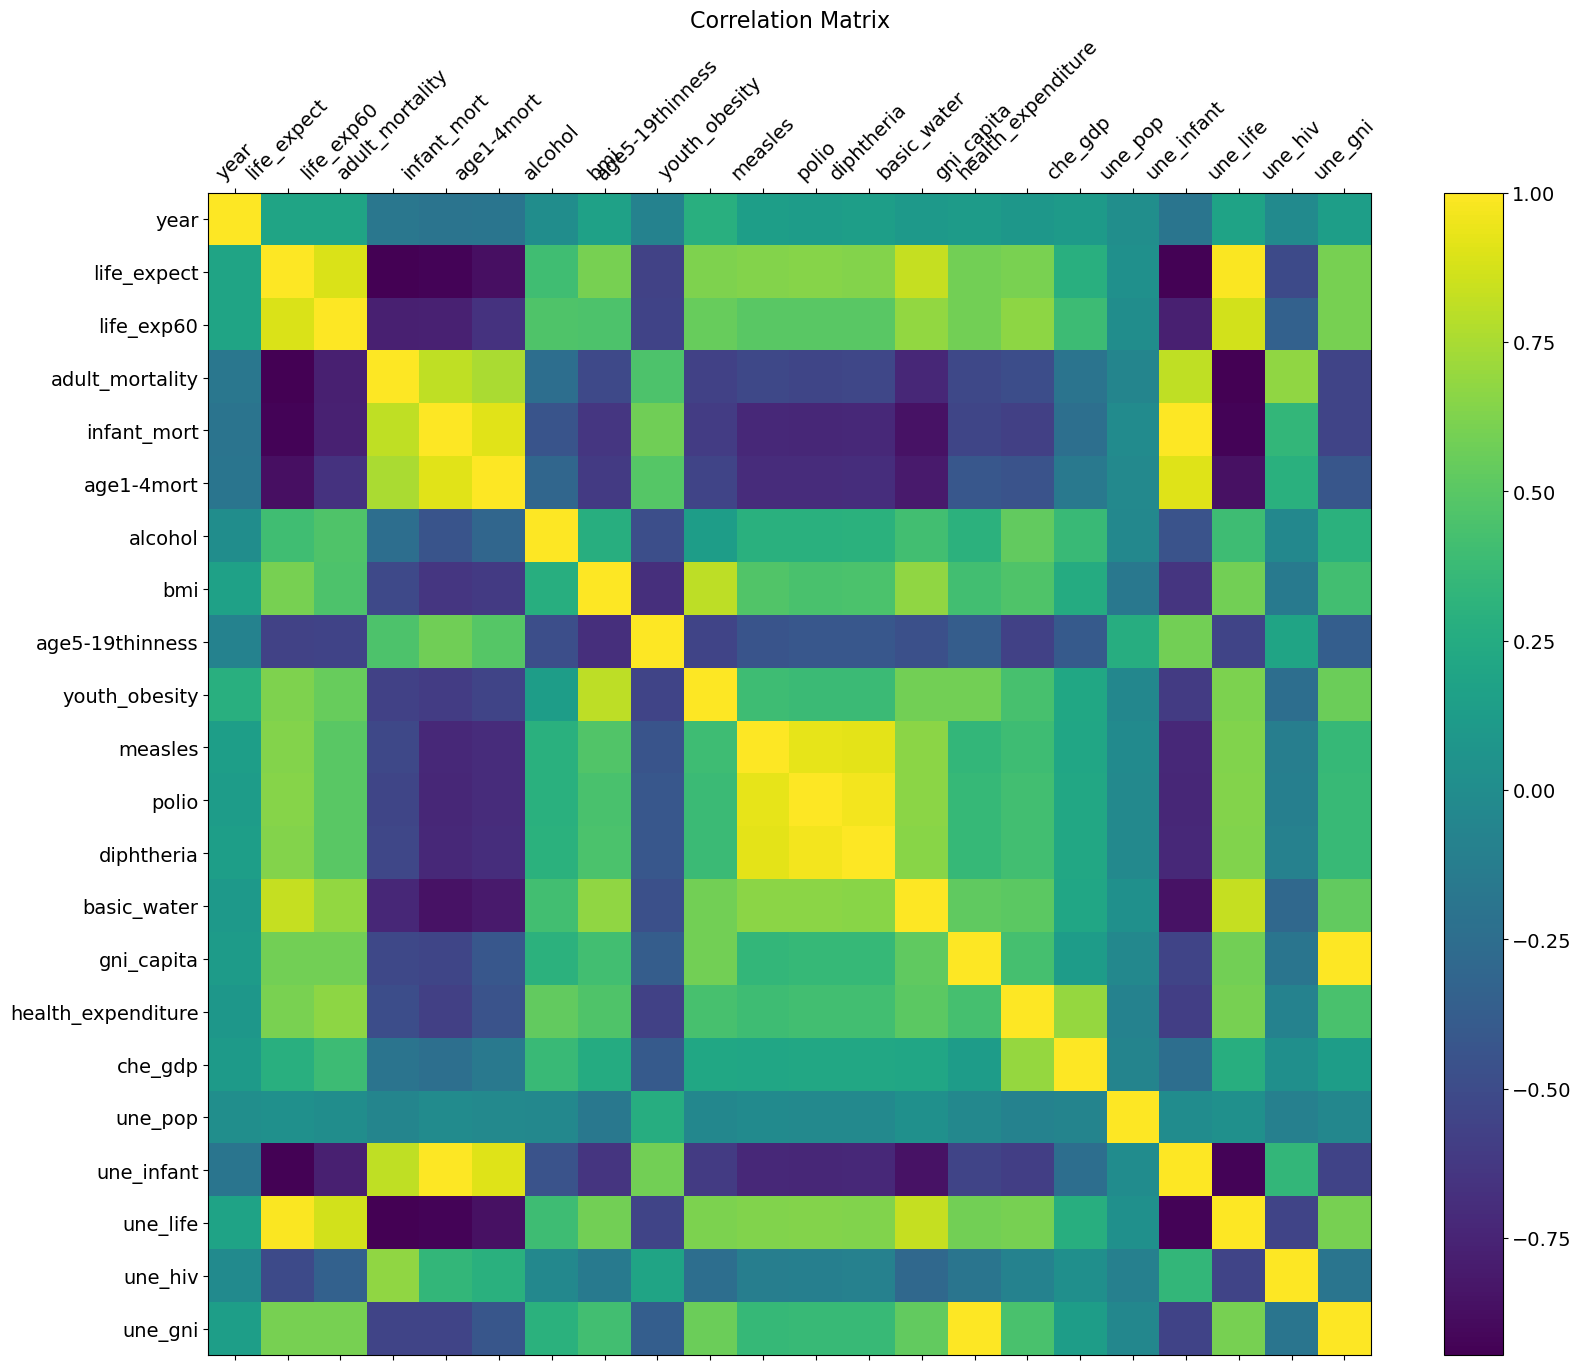

In [6]:
figure = plt.figure(figsize=(19, 15))
plt.matshow(continuous_df.corr(), fignum=figure.number)
plt.xticks(range(continuous_df.select_dtypes(['number']).shape[1]), continuous_df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(continuous_df.select_dtypes(['number']).shape[1]), continuous_df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [7]:
# Find the correlations above a specific threshold
high_corr_pairs = continuous_df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False)
filtered_pairs = high_corr_pairs[high_corr_pairs > .6]
filtered_pairs = filtered_pairs[filtered_pairs < 1.0]
life_exp_high_correlation = filtered_pairs
print(filtered_pairs)

infant_mort    une_infant       0.996975
une_infant     infant_mort      0.996975
gni_capita     une_gni          0.995786
une_gni        gni_capita       0.995786
une_life       life_expect      0.991448
                                  ...   
une_gni        life_expect      0.603019
infant_mort    youth_obesity    0.602402
youth_obesity  infant_mort      0.602402
life_exp60     une_gni          0.602258
une_gni        life_exp60       0.602258
Length: 132, dtype: float64


In [8]:
filtered_pairs.loc[lambda x: x.index.get_level_values(level=0).str.startswith('life_expect')]

life_expect  une_life              0.991448
             adult_mortality       0.946419
             une_infant            0.931899
             infant_mort           0.930113
             life_exp60            0.886159
             age1-4mort            0.864414
             basic_water           0.831099
             polio                 0.646486
             diphtheria            0.640473
             measles               0.640408
             youth_obesity         0.621000
             health_expenditure    0.609787
             une_gni               0.603019
dtype: float64

The following variables have high correlation with life_expect:
- infant_mort
- age1-4mort
- age5-19obesity
- gni_capita
- une_life
- une_infant
- measles
- polio
- diptheria
- basic_water
- gni_capita
- health_expenditure
- une_life
- une_gni

However, the variables related to mortality rates or expectancy rates are already self-describing, so I will ignore them for the purposes of this project.  They will be useful later on to validate any assumptions made.

### Variables for analysis {-}
(Descriptions are from the kaggle codebook)

<ul>
<li><b>life_expect</b> (dependent):  Life expectancy at birth measured in years</li>
<li><b>bmi</b>: Mean BMI</li>
<li><b>youth_obesity</b>(renamed from age5-19obesit`): Prevalence of obesity among children and adolescents. Crude estimate percentage for children with BMI < (median - 2 stdev)</li>
<li><b>polio</b>: Polio (Pol3) immunization coverage among 1-year-olds (%)</li>
<li><b>diptheria</b>: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)</li>
<li><b>measles</b>: Measles-containing-vaccine first-dose (MCV1) immunization coverage among 1-year-olds (%)</li>
<li><b>health_expenditure</b> (renamed from gghe-d): Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP)</li>
</ul>

In [9]:
analysis_df = who_df[['life_expect', 'bmi', 'youth_obesity', 'polio', 'diphtheria', 'measles', 'health_expenditure', 'year']].copy()

### Further cleanup {-}

Find any rows that have na data to determine how to handle


In [10]:
analysis_df[analysis_df.isna().any(axis=1)]

,life_expect,bmi,youth_obesity,polio,diphtheria,measles,health_expenditure,year
170,45.92585,23.3,0.8,78.0,78.0,75.0,NaN,2000
171,45.39107,23.3,0.9,76.0,75.0,73.0,NaN,2001
172,45.04528,23.3,1.0,73.0,71.0,70.0,NaN,2002
173,44.94328,23.4,1.2,70.0,68.0,68.0,NaN,2003
174,45.02172,23.4,1.3,67.0,65.0,66.0,NaN,2004
...,...,...,...,...,...,...,...,...
2718,71.75651,24.0,8.1,99.0,96.0,98.0,NaN,2015
2719,71.94337,24.1,8.5,99.0,96.0,99.0,NaN,2016
2737,59.13620,19.9,0.9,NaN,NaN,NaN,NaN,2000
2738,59.65171,20.0,1.0,NaN,NaN,NaN,NaN,2001


In [11]:
# Impute the mean for na continuous variables
analysis_df['health_expenditure'].fillna(analysis_df['health_expenditure'].mean(), inplace=True)
analysis_df['bmi'].fillna(analysis_df['bmi'].mean(), inplace=True)
analysis_df['polio'].fillna(analysis_df['polio'].mean(), inplace=True)
analysis_df['diphtheria'].fillna(analysis_df['diphtheria'].mean(), inplace=True)
analysis_df['measles'].fillna(analysis_df['measles'].mean(), inplace=True)

In [12]:
def print_summary(series, title, x_title, y_title='Frequency', bins=50):
    print(series.describe())       

    plt.subplot(1, 2, 1)
    sns.histplot(series, bins=bins)
    plt.title(title)
    plt.ylabel(y_title)
    plt.xlabel(x_title)

    plt.subplot(1, 2, 2)
    sns.boxplot(y=series)

    plt.tight_layout()
    plt.show()

count    3111.000000
mean       69.146384
std         9.129761
min        36.227360
25%        63.200095
50%        71.597200
75%        75.537030
max        84.166160
Name: life_expect, dtype: float64


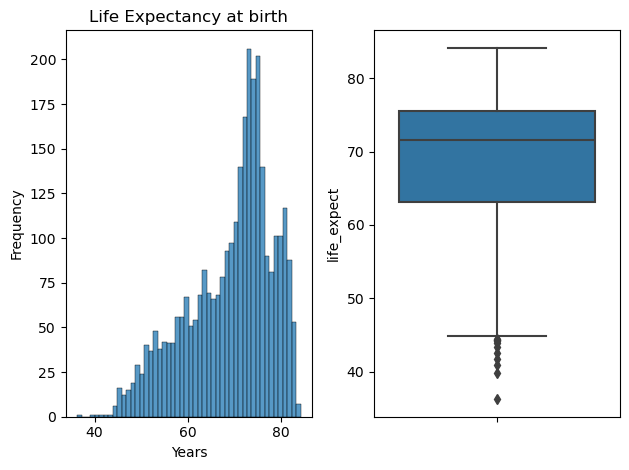

In [13]:
life_expect = analysis_df['life_expect']
print_summary(life_expect, 'Life Expectancy at birth', 'Years')


_Life expectancy is left/negatively skewed with a long tail on the left side of the histogram._

count    3111.000000
mean       25.052714
std         2.181422
min        19.800000
25%        23.300000
50%        25.500000
75%        26.500000
max        32.200000
Name: bmi, dtype: float64


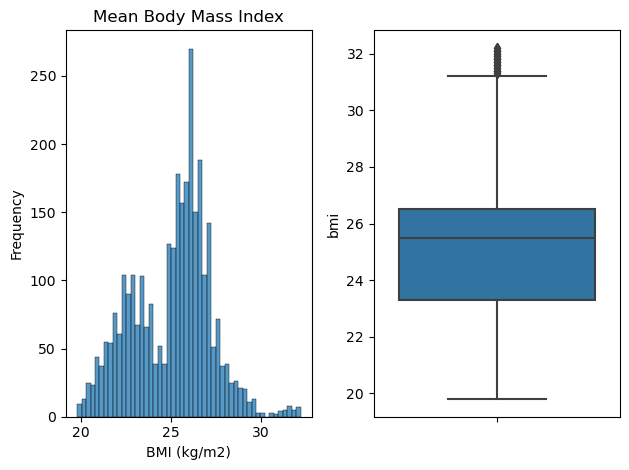

In [14]:
bmi = analysis_df['bmi']
print_summary(bmi, 'Mean Body Mass Index', 'BMI (kg/m2)')

_BMI has a bimodal distribution, with two peaks occuring around 22-24 and at 26._

count    3077.000000
mean        5.972278
std         4.530812
min         0.100000
25%         2.000000
50%         5.200000
75%         8.900000
max        26.700000
Name: youth_obesity, dtype: float64


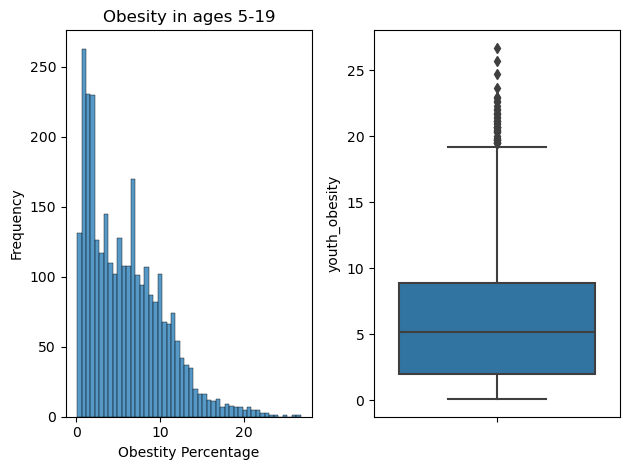

In [15]:
youth_obesity = analysis_df['youth_obesity']
print_summary(youth_obesity, 'Obesity in ages 5-19', 'Obestity Percentage')

_Obesity in younger children and teenagers is heavily right/positively skewed with a very long tail above 15%_

count    3111.000000
mean       86.608991
std        14.897509
min         8.000000
25%        81.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: polio, dtype: float64


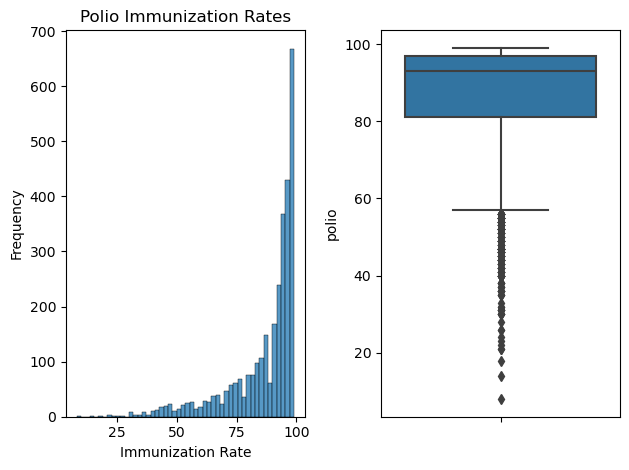

In [16]:
polio = analysis_df['polio']
print_summary(polio, 'Polio Immunization Rates', 'Immunization Rate')

_Immunization for polio is very left/negatively skewed with a very long tail on the right._

count    3111.000000
mean       86.420116
std        15.285254
min        19.000000
25%        82.000000
50%        93.000000
75%        97.000000
max        99.000000
Name: diphtheria, dtype: float64


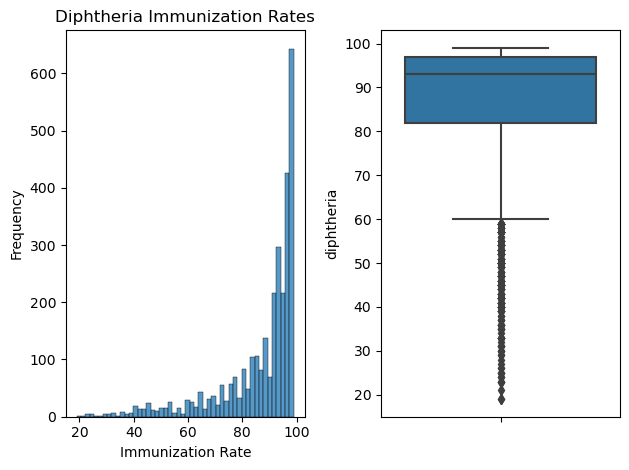

In [55]:
diphtheria = analysis_df['diphtheria']
print_summary(diphtheria, 'Diphtheria Immunization Rates', 'Immunization Rate')

_This distribution (and the variable's mode and mean) are identical to that of polio.  This leads me to believe that polio and diphtheria immunizations are given together._

count    3111.000000
mean       85.540427
std        15.235493
min        16.000000
25%        80.000000
50%        92.000000
75%        96.000000
max        99.000000
Name: measles, dtype: float64


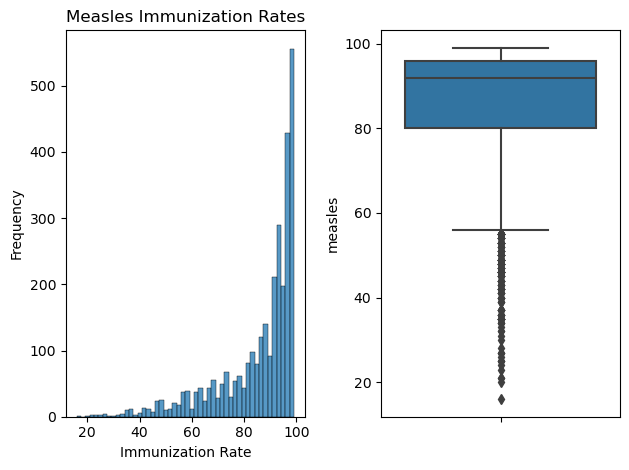

In [56]:
measles = analysis_df['measles']
print_summary(measles, 'Measles Immunization Rates', 'Immunization Rate')

As seen above, this distribution (and the variable's mode and mean) are identical to that of polio and diphtheria. After doing more research, these vaccines are typically given together in a DTaP vaccine containing all three vaccines.

Given that discovery, I will only use one of the variables in further analysis.

count    3111.000000
mean        3.122935
std         2.057816
min         0.062360
25%         1.568265
50%         2.662370
75%         4.219620
max        12.062730
Name: health_expenditure, dtype: float64


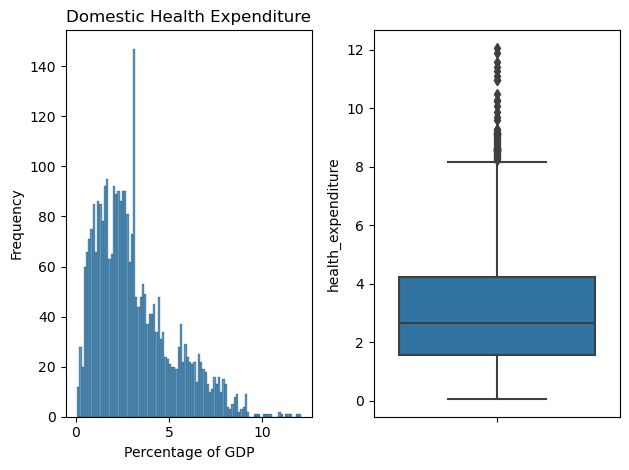

In [19]:
health_expenditure = analysis_df['health_expenditure']
print_summary(health_expenditure, 'Domestic Health Expenditure', 'Percentage of GDP', 'Frequency', bins=100)

_This distribution is right/positively skewed, with a shorter tail.  I couldn't tell if it was also bimodal since there seems to be a slight hump around the 6% mark.  However, when increasing or reducing the number of bins, I think this distribution is still typically asymmetrical._

### Comparison using a Probability Mass Function {-}

I was trying to find some sort of consistent value to filter data on, but `year` seemed like the only thing that would work, so the comparisons will segment data by year and use that for comparisons for a single variable.

In [20]:
bmi_pmf = bmi.value_counts(normalize=True).sort_index()

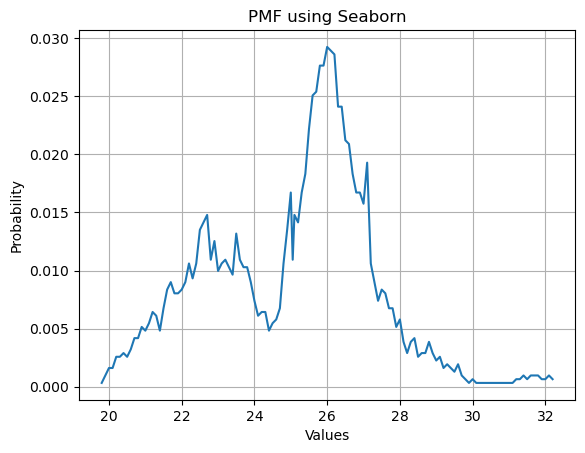

In [21]:
sns.lineplot(x=bmi_pmf.index, y=bmi_pmf.values)
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('PMF using Seaborn')
plt.grid(True)
plt.show()

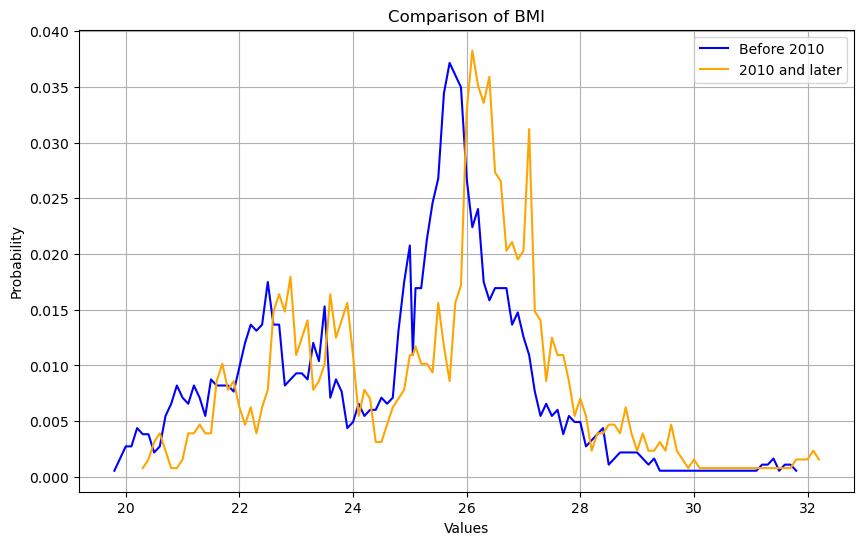

In [22]:
pre_2010 = analysis_df[analysis_df['year'] < 2010]
pre_2010_pmf = pre_2010['bmi'].value_counts(normalize=True)

after_including_2010 = analysis_df.loc[analysis_df['year'] >= 2010]
after_including_2010_pmf = after_including_2010['bmi'].value_counts(normalize=True)

# Plot the PMFs side by side
plt.figure(figsize=(10, 6))
sns.lineplot(x=pre_2010_pmf.index, y=pre_2010_pmf.values, color='blue', label='Before 2010')
sns.lineplot(x=after_including_2010_pmf.index, y=after_including_2010_pmf.values, color='orange', label='2010 and later')
plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Comparison of BMI')
plt.grid(True)
plt.legend()
plt.show()

_Interesting to note that there is a clear increase in BMI for reports after 2010._

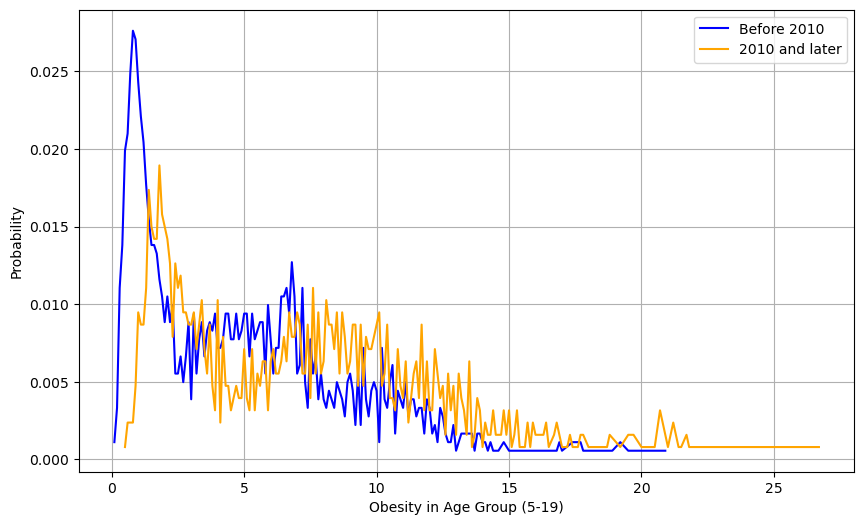

In [23]:
# This was such an interesting comparison, I did the same thing for teenage obesity levels 
# to see if the same effect was in a smaller sample of the population
pre_2010 = analysis_df[analysis_df['year'] < 2010]
pre_2010_pmf = pre_2010['youth_obesity'].value_counts(normalize=True)

after_including_2010 = analysis_df.loc[analysis_df['year'] >= 2010]
after_including_2010_pmf = after_including_2010['youth_obesity'].value_counts(normalize=True)

# Plot the PMFs side by side
plt.figure(figsize=(10, 6))
sns.lineplot(x=pre_2010_pmf.index, y=pre_2010_pmf.values, color='blue', label='Before 2010')
sns.lineplot(x=after_including_2010_pmf.index, y=after_including_2010_pmf.values, color='orange', label='2010 and later')
plt.ylabel('Probability')
plt.xlabel("Obesity in Age Group (5-19)")
plt.legend()
plt.grid(True)
plt.show()

_Again, we see a similar trend in a different group of the population.  Note in the years after and including 2010, the distribution has become less positively skewed and the tail has grown when compared to the sample before 2010._

### Cumulative Distribution Function (CDF) {-}

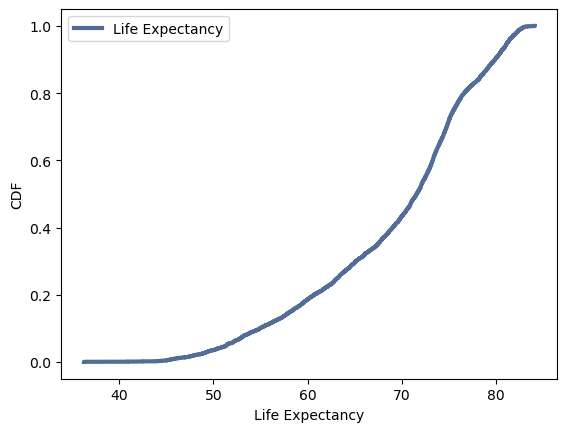

<Figure size 800x600 with 0 Axes>

In [24]:
life_expect_cdf = thinkstats2.Cdf(analysis_df['life_expect'], label = "Life Expectancy")
thinkplot.Cdf(life_expect_cdf)
thinkplot.Show(xlabel = "Life Expectancy", ylabel = "CDF")

69.1463837833494 83.35253040642105 9.129760698201299


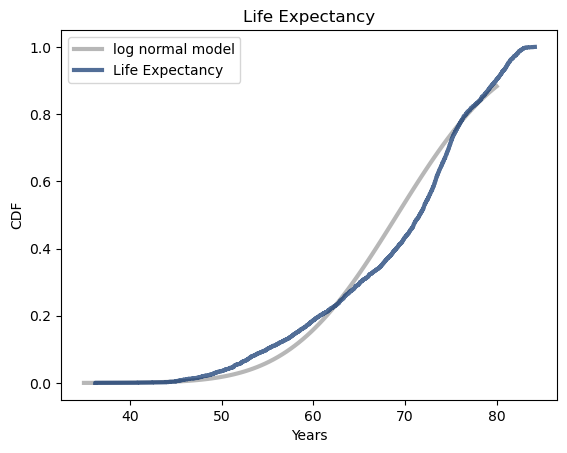

In [25]:
#Log CDF compared to log normal

life_expect_mean = analysis_df['life_expect'].mean()
life_expect_var = analysis_df['life_expect'].var()
life_expect_sig = np.sqrt(life_expect_var)
print(life_expect_mean, life_expect_var, life_expect_sig)

xs, ps = thinkstats2.RenderNormalCdf(life_expect_mean, life_expect_sig, low = 35, high = 80)

life_expect_cdf = thinkstats2.Cdf(analysis_df['life_expect'], label = "Life Expectancy")

thinkplot.Plot(xs, ps, label = "log normal model", color = "0.6")
thinkplot.Cdf(life_expect_cdf)
thinkplot.Config(title = "Life Expectancy",
                xlabel = "Years",
                ylabel = "CDF")



### Analytical Distribution {-}

Mean, Var 69.25796309281732 76.72990397157666
Sigma 8.759560717957074


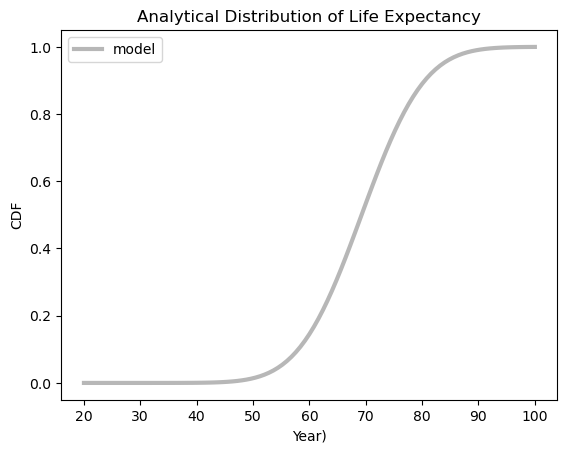

In [37]:
mean, stdev = thinkstats2.TrimmedMeanVar(analysis_df['life_expect'], p=0.01)

print('Mean, Var', mean, stdev)

# plot the analytic model
sigma = np.sqrt(stdev)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mean, sigma, low=20, high=100)

thinkplot.Plot(xs, ps, label='model', color ='0.6')
thinkplot.Config(title = 'Analytical Distribution of Life Expectancy',
                xlabel = 'Year)',
                ylabel = 'CDF')

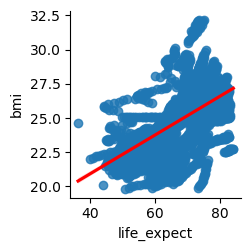

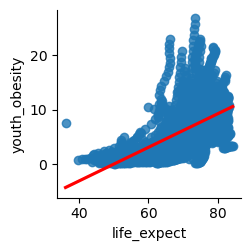

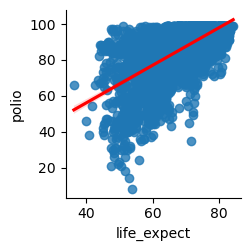

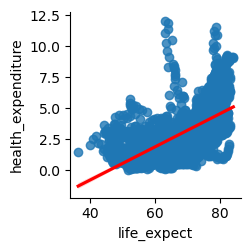

In [54]:
for i in [1, 2, 3, 6]:
    sns.pairplot(data=analysis_df,
            kind="reg",
            y_vars=analysis_df.columns[i],
            x_vars=['life_expect'],
            plot_kws={'line_kws':{'color':'red'}})

### Scatter Plots comparing two variables {-}
I will compare life expectancy to the expenditure of government money on health

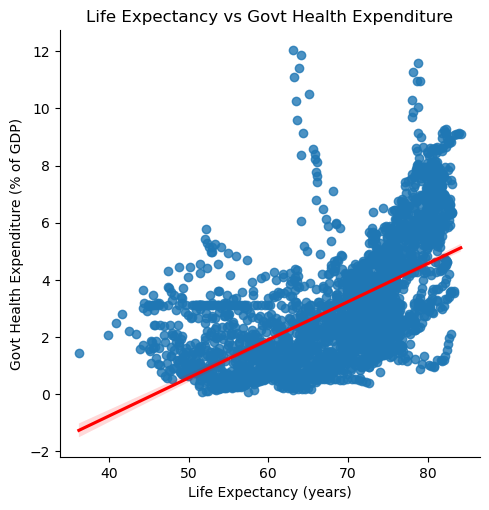

In [560]:
sns.lmplot(x='life_expect', y='health_expenditure', data=analysis_df, line_kws={'color':"red"})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Govt Health Expenditure (% of GDP)')
plt.title('Life Expectancy vs Govt Health Expenditure')
plt.show()

As expected, there is a positive correlation between life expectancy and the health expenditure of a government.  This is confirmed by an analysis of the spearman and pearson correlations between the values.


In [562]:
rho, _ = spearmanr(analysis_df['life_expect'], analysis_df['health_expenditure'])
print(f"Spearman correlation: {rho:.4f}")
print(f"Pearson correlation coefficient: {analysis_df['life_expect'].corr(analysis_df['health_expenditure']):.4f}")

Spearman correlation: 0.6671
Pearson correlation coefficient: 0.5911



And a similar comparison between life expectancy and BMI

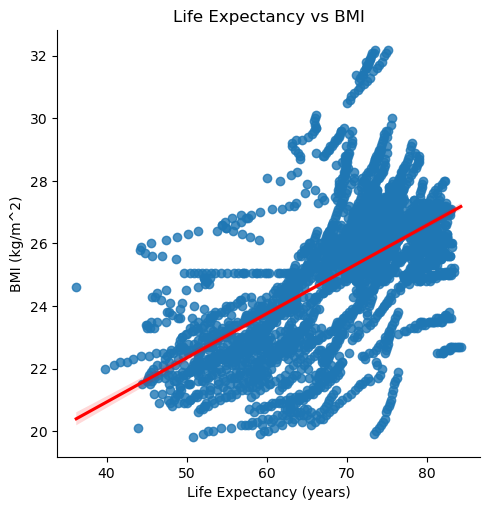

In [565]:
sns.lmplot(x='life_expect', y='bmi', data=analysis_df, line_kws={'color':"red"})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('BMI (kg/m^2)')
plt.title('Life Expectancy vs BMI')
plt.show()

In [453]:
rho, _ = spearmanr(analysis_df['life_expect'], analysis_df['bmi'])
print(f"Spearman correlation: {rho:.4f}")
print(f"Pearson correlation coefficient: {analysis_df['life_expect'].corr(analysis_df['bmi']):.4f}")

Spearman correlation: 0.5834
Pearson correlation coefficient: 0.5924


The correlation between life expectancy and BMI is still positive, but only slightly.

### Hypothesis Test {-}
Hypothesis: Governmental health expenditure is causitive to higher life expectancy

In [473]:
# Borrowed these helpers from thinkstats
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [567]:
life_expectancy_health_expenditure = analysis_df['life_expect'].values[:500], analysis_df['health_expenditure'].values[:500]

health_expenditure_hypothesis = CorrelationPermute(life_expectancy_health_expenditure)
p_value = health_expenditure_hypothesis.PValue(1000)

print('P Value of test:', round(p_value, 3))
print(health_expenditure_hypothesis.actual, health_expenditure_hypothesis.MaxTestStat())

P Value of test: 0.003
0.13041427947150694 0.14684206051170612


_The low p-value shows that, while there is some correlation between life expectancy and govermental health expenditure, it is not large enough to be statistically significant._  Let's try again with the other variable.

In [570]:
life_expectancy_bmi = analysis_df['life_expect'].values[:500], analysis_df['bmi'].values[:500]

bmi_hypothesis = CorrelationPermute(life_expectancy_bmi)
p_value = bmi_hypothesis.PValue(1000)

print('P Value of test:', round(p_value, 3))
print(bmi_hypothesis.actual, bmi_hypothesis.MaxTestStat())

P Value of test: 0.0
0.3956565748216251 0.14343644069932132


With an even lower p Value, it is safe to say that the correlation between BMI and life expectancy is not satistically significant either.

### Regression Analysis {-}


In [610]:
formula = 'life_expect ~ bmi + health_expenditure + diphtheria + polio + youth_obesity'
logit = smf.ols(formula, data=analysis_df)
results = logit.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            life_expect   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     1080.
Date:                Fri, 02 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:34:50   Log-Likelihood:                -9282.0
No. Observations:                2994   AIC:                         1.858e+04
Df Residuals:                    2988   BIC:                         1.861e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.2642      1.765     21.674      0.000      34.803      41.726
bmi                    0.0990      0.079      1.248      0.212      -0.056       0.254
health_expenditure     1.2767      0.055     23.142      0.000       1.169       1.385
diphtheria             0.0553      0.026      2.138      0.033       0.005       0.106
polio                  0.1835      0.026      6.942      0.000       0.132       0.235
youth_obesity          0.6491      0.037     17.652      0.000       0.577       0.721
==============================================================================
Omnibus:                      640.778   Durbin-Watson:                   0.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1510.310
Skew:                          -1.186   Prob(JB):                         0.00
Kurtosis:                       5.546   Cond. No.                     2.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Reviewing the results from the regression analysis, we can conclude:

- The R-squared value is greater than 0.5 so it is better than random, though not a large amount.  An r-squared value that approaches 1 is a better fit.
- The Durbin-Watson measures homoscedasticity, and a low number of 0.179 implies a strong positive serial correlation in the residuals.
- The kurtosis value of 5.5 implies that there are more extreme values in the distribution that would be a normal distribution.  Therefore, there must be significant outliers or extreme values.